In [1]:
import pandas as pd
import numpy as np

In [22]:
path = 'C:/Users/yushy/Documents/데이터/ubion/csv/'
corona=pd.read_csv(path+'corona.csv')

In [23]:
corona.drop(['Unnamed: 0'],axis='columns',inplace=True)

In [24]:
corona.sort_values(['createDt'],inplace=True)

In [25]:
corona.columns = ['등록일시','사망자','확진자','게시글번호','기준일','기준시간','수정일시','누적의심자','누적확진률']

In [26]:
corona.reset_index(drop=True, inplace=True)

In [27]:
corona['일일확진자']=corona['확진자'].diff()
corona['일일사망자']=corona['사망자'].diff()
corona.head()

,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률,일일확진자,일일사망자
0,2020-03-10 00:00:00.000,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308,NaN,NaN
1,2020-03-11 00:00:00.000,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175,242.0,6.0
2,2020-03-12 00:00:00.000,66,7869,53,20200312,00:00,2021-10-07 10:30:51.51,234998.0,3.621744,114.0,6.0
3,2020-03-13 00:00:00.000,67,7979,54,20200313,00:00,2021-10-07 10:30:51.51,248647.0,3.458499,110.0,1.0
4,2020-03-14 00:00:00.000,72,8086,55,20200314,00:00,2021-10-07 10:30:51.51,261335.0,3.318000,107.0,5.0


In [28]:
corona['일일확진자'] = corona['일일확진자'].fillna(0)

fillna(옵션)\
method 속성 > ffill,bfill\
ffill = 앞의 값으로 채운, bfill = 뒤쪽 값으로 채운다

In [29]:
corona['누적의심자'].fillna(method='ffill')

0        210144.0
1        222395.0
2        234998.0
3        248647.0
4        261335.0
          ...    
815    21518073.0
816    21518073.0
817    21518073.0
818    21518073.0
819    21518073.0
Name: 누적의심자, Length: 820, dtype: float64

In [31]:
corona['누적의심자'].fillna(corona['누적의심자'].mean())

0      2.101440e+05
1      2.223950e+05
2      2.349980e+05
3      2.486470e+05
4      2.613350e+05
           ...     
815    7.545057e+06
816    7.545057e+06
817    7.545057e+06
818    7.545057e+06
819    7.545057e+06
Name: 누적의심자, Length: 820, dtype: float64

filter 기능\
query()\


In [35]:
# corona.query('444<index<448') 이 왜진

corona.loc[444:448,:]

,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률,일일확진자,일일사망자
444,2021-05-29 00:00:00.000,1951,139427,496,20210529,00:00,2021-10-07 10:30:51.51,9733588.0,1.450884,533.0,5.0
445,2021-05-30 00:00:00.0,1959,140337,498,20210531,00:00,2021-10-14 13:48:56.821,9761156.0,1.456805,910.0,8.0
446,2021-05-30 00:00:00.000,1957,139907,497,20210530,00:00,2021-10-07 10:30:51.51,9747612.0,1.454166,-430.0,-2.0
447,2021-06-01 00:00:00.000,1963,140796,499,20210601,00:00,2021-10-07 10:30:51.51,9798400.0,1.455890,889.0,6.0
448,2021-06-02 00:00:00.000,1965,141473,500,20210602,00:00,2021-10-07 10:30:51.51,9834348.0,1.457668,677.0,2.0


lambda함수
일반 def 함수 파생변수
누적 확진률 컬럼에서 누적 확진률의 평균보다 높으면 high 낮으면 low

In [40]:
corona['누적확진률'].fillna(corona['누적확진률'].mean(),inplace=True)
corona['H/L']=corona['누적확진률'].apply(lambda x: 'High' if (x>corona['누적확진률'].mean()) else 'low')

corona.tail()

,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률,일일확진자,일일사망자,H/L
815,2022-06-04 08:56:49.219,24238,18153814,900,20220604,00:00,2022-06-08 09:11:26.303,NaN,1.556435,12039.0,9.0,High
816,2022-06-05 08:53:19.426,24258,18163648,901,20220605,00:00,2022-06-08 09:11:04.758,NaN,1.556435,9834.0,20.0,High
817,2022-06-06 09:00:06.734,24279,18168670,902,20220606,00:00,2022-06-08 09:10:50.441,NaN,1.556435,5022.0,21.0,High
818,2022-06-07 09:09:00.897,24299,18174842,903,20220607,00:00,2022-06-08 09:10:36.846,NaN,1.556435,6172.0,20.0,High
819,2022-06-08 09:09:05.982,24305,18188200,904,20220608,00:00,NaN,NaN,1.556435,13358.0,6.0,High


In [42]:
def h_l(x):
    if x > corona['누적확진률'].mean():
        return 'High'
    else :
        return 'Low'

In [44]:
corona['누적확진률'].apply(h_l)

0      High
1      High
2      High
3      High
4      High
       ... 
815    High
816    High
817    High
818    High
819    High
Name: 누적확진률, Length: 820, dtype: object

In [51]:
corona['등록일시']=pd.to_datetime(corona['등록일시'],format = "%Y-%m-%d %H:%M:%S")

In [63]:
corona['요일']=corona['등록일시'].dt.weekday
corona.head()

,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률,일일확진자,일일사망자,H/L,요일
0,2020-03-10,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308,0.0,NaN,High,1
1,2020-03-11,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175,242.0,6.0,High,2
2,2020-03-12,66,7869,53,20200312,00:00,2021-10-07 10:30:51.51,234998.0,3.621744,114.0,6.0,High,3
3,2020-03-13,67,7979,54,20200313,00:00,2021-10-07 10:30:51.51,248647.0,3.458499,110.0,1.0,High,4
4,2020-03-14,72,8086,55,20200314,00:00,2021-10-07 10:30:51.51,261335.0,3.318000,107.0,5.0,High,5


In [66]:
#apply 함수를 이용해서 숫자로 표시되어 있는 요일을 한글로 변경

def trans_day(x):
    if x==1:
        return '일'
    elif x==1:
        return '월'
    elif x==2:
        return '화'
    elif x==3:
        return '수'
    elif x==4:
        return '목'
    elif x==5:
        return '금'
    else:
        return '토'

corona['요일']=corona['요일'].apply(trans_day)

In [61]:
from matplotlib import font_manager,rc

In [62]:
import matplotlib.pylab as plt

<function matplotlib.pyplot.show(close=None, block=None)>

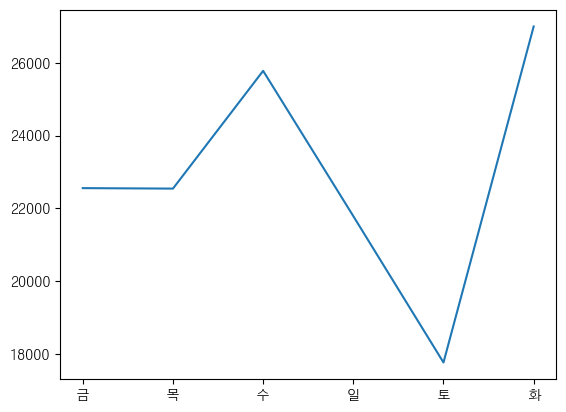

In [67]:
week_corona = corona.groupby("요일").mean()
week_corona["일일확진자"]

x = week_corona.index
y = week_corona['일일확진자'].to_list()

file_path = 'C:/Windows/Fonts/H2GTRM.TTF'
font = font_manager.FontProperties(fname=file_path).get_name()

rc('font',family=font)

plt.plot(x,y)
plt.show

번외 코드

In [68]:
!pip install yfinance

     ---------------------------------------- 3.6/3.6 MB 3.0 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [69]:
import yfinance as yf

In [70]:
yf.download('AAPL',start = '2019-01-01')

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,39.632500,39.840000,39.119999,39.435001,38.124851,140014000
2019-01-02,38.722500,39.712502,38.557499,39.480000,38.168350,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.366508,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.833580,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.753815,219111200
...,...,...,...,...,...,...
2022-08-25,168.779999,170.139999,168.350006,170.029999,170.029999,51218200
2022-08-26,170.570007,171.050003,163.559998,163.619995,163.619995,78823500
2022-08-29,161.149994,162.899994,159.820007,161.380005,161.380005,73314000


In [74]:
#삼성전자 파일 불러옴.
samsung = yf.download('005930.KS',start = '2019-01-01')


[*********************100%***********************]  1 of 1 completed


In [88]:
samsung[['Open','High','Low','Close','Adj Close']] = samsung[['Open','High','Low','Close','Adj Close']].round(2)

In [92]:
samsung.head()

,Open,High,Low,Close,Adj Close,Volume,등락폭,등락율
Date,,,,,,,,
2019-01-02,39400.0,39400.0,38550.0,38750.0,34936.32,7847664,-650.0,-1.649746
2019-01-03,38300.0,38550.0,37450.0,37600.0,33899.50,12471493,-700.0,-1.827676
2019-01-04,37450.0,37600.0,36850.0,37450.0,33764.26,14108958,0.0,0.000000
2019-01-07,38000.0,38900.0,37800.0,38750.0,34936.32,12748997,750.0,1.973684
2019-01-08,38000.0,39200.0,37950.0,38100.0,34350.30,12756554,100.0,0.263158


In [90]:
samsung['등락폭']=samsung['Close']-samsung['Open']

In [91]:
samsung['등락율']=samsung['등락폭']/samsung['Open']*100

In [93]:
a = samsung['Open'].tolist()
b = samsung['Close'].tolist()
c = samsung['등락율'].tolist()
d = samsung['Volume'].tolist()

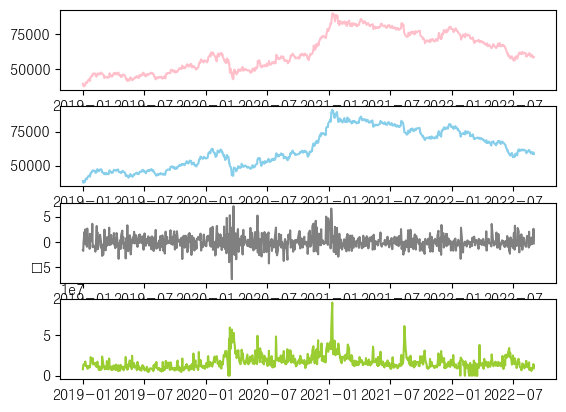

In [99]:
plt.subplot(4,1,1)
plt.plot(a,color='pink')

plt.subplot(4,1,2)
plt.plot(b,color='skyblue')

plt.subplot(4,1,3)
plt.plot(c,color='gray')

plt.subplot(4,1,4)
plt.plot(d,color='yellowgreen')

plt.show()

다시 실습

In [102]:
uri = pd.read_csv(path+'uriage.csv')
uri.head()

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02,상품A,100.0,김가온
1,2019-07-13 13:05,상 품 S,NaN,김우찬
2,2019-05-11 19:42,상 품 a,NaN,김유찬
3,2019-02-12 23:40,상품Z,2600.0,김재현
4,2019-04-22 3:09,상품a,NaN,김강현


In [104]:
uri['purchase_date']=pd.to_datetime(uri['purchase_date'],format='%Y-%m-%d %H:%M')

In [113]:
uri['item_name']=uri['item_name'].astype('str')

In [136]:
uri.sort_values(['item_name'],ascending=True,inplace=True)
uri.head()

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02:00,상품A,100.0,김가온
952,2019-02-12 06:06:00,상품A,100.0,김태경
957,2019-07-19 14:12:00,상품A,NaN,김서윤
1009,2019-06-12 10:08:00,상품A,100.0,김지용
1036,2019-07-26 15:06:00,상품A,100.0,김연준


In [137]:
uri.reset_index(drop=True)

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02:00,상품A,100.0,김가온
1,2019-02-12 06:06:00,상품A,100.0,김태경
2,2019-07-19 14:12:00,상품A,NaN,김서윤
3,2019-06-12 10:08:00,상품A,100.0,김지용
4,2019-07-26 15:06:00,상품A,100.0,김연준
...,...,...,...,...
2994,2019-03-28 08:28:00,상품Y,2500.0,김준형
2995,2019-03-07 08:59:00,상품Y,2500.0,김재현
2996,2019-05-05 18:09:00,상품Y,2500.0,김도경
2997,2019-03-14 12:23:00,상품Y,NaN,김연호


In [138]:
uri.isnull().sum()

purchase_date      0
item_name          0
item_price       387
customer_name      0
dtype: int64

In [186]:
price = uri.groupby(['item_name']).mean()
price

,item_price
item_name,
상품A,100.0
상품B,200.0
상품C,300.0
상품D,400.0
상품E,500.0
상품F,600.0
상품G,700.0
상품H,800.0
상품I,900.0


In [216]:
pri=price.to_dict()
price_dict = pri["item_price"]
price_dict

{'상품A': 100.0,
 '상품B': 200.0,
 '상품C': 300.0,
 '상품D': 400.0,
 '상품E': 500.0,
 '상품F': 600.0,
 '상품G': 700.0,
 '상품H': 800.0,
 '상품I': 900.0,
 '상품J': 1000.0,
 '상품K': 1100.0,
 '상품L': 1200.0,
 '상품M': 1300.0,
 '상품N': 1400.0,
 '상품O': 1500.0,
 '상품P': 1600.0,
 '상품Q': 1700.0,
 '상품R': 1800.0,
 '상품S': 1900.0,
 '상품T': 2000.0,
 '상품U': 2100.0,
 '상품V': 2200.0,
 '상품W': 2300.0,
 '상품X': 2400.0,
 '상품Y': 2500.0,
 '상품Z': 2600.0}

In [190]:
uri['item_price'] = uri['item_price'].fillna(uri['item_name'].apply(lambda x: pri.get(x)))
uri

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02:00,상품A,100.0,김가온
952,2019-02-12 06:06:00,상품A,100.0,김태경
957,2019-07-19 14:12:00,상품A,100.0,김서윤
1009,2019-06-12 10:08:00,상품A,100.0,김지용
1036,2019-07-26 15:06:00,상품A,100.0,김연준
...,...,...,...,...
1813,2019-03-28 08:28:00,상품Y,2500.0,김준형
2487,2019-03-07 08:59:00,상품Y,2500.0,김재현
91,2019-05-05 18:09:00,상품Y,2500.0,김도경
2741,2019-03-14 12:23:00,상품Y,2500.0,김연호


다른방식

fig_null = uri['item_price'].isna()

for name in list(name_list):\
    price = uri.loc[(~fig_null) & (uri['item_name']==name),'item_price'].mean()

    uri['item_price'].loc[(fig_null)&(uri['item_name']==name)]=price
    


다른 실습2

1. 단순하게 행을 추가
2. 열을 추가(단순히 열을 추가 / 특정 조건에 맞게 열을 추가)

In [202]:
df1 = pd.DataFrame({'S1' : [1,2,3,4], 'S2' : [5,6,7,8]})
df2 = pd.DataFrame([1,2])

In [204]:
pd.concat([df1,df2],axis='rows').reset_index()

,index,S1,S2,0
0,0,1.0,5.0,NaN
1,1,2.0,6.0,NaN
2,2,3.0,7.0,NaN
3,3,4.0,8.0,NaN
4,0,NaN,NaN,1.0
5,1,NaN,NaN,2.0


In [206]:
df4 = pd.DataFrame({
    'id' : [1,2,3,4,5],
    'item' : ['a','b','c','d','e']
})

df5 = pd.DataFrame({
    'id' : [1,4,7,3,9],
    'name' : ['kim','lee','park','jaygal','namgoong']
})

In [210]:
pd.merge(df4,df5,on='id',how='outer')

,id,item,name
0,1,a,kim
1,2,b,NaN
2,3,c,jaygal
3,4,d,lee
4,5,e,NaN
5,7,NaN,park
6,9,NaN,namgoong
